## **Importação de Pacotes e criação da paleta de cores**


In [ ]:
install.packages("dados")
install.packages("corrplot")
install.packages("caret")

library(caret)
library("dados")
library(corrplot)

attach(pinguins)

paleta_azul <- colorRampPalette(c("white", "lightblue", "darkblue"))
cores_azuis <- paleta_azul(10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘AmesHousing’, ‘babynames’, ‘fueleconomy’, ‘gapminder’, ‘Lahman’, ‘palmerpenguins’, ‘nasaweather’, ‘nycflights13’, ‘pixarfilms’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

corrplot 0.92 loaded



## **FIltragem e tratamento dos dados**

In [ ]:
#REMOVENDO VALORES NULOS
pinguins_limpo <- na.omit(pinguins)
#REORDENANDO COLUNAS PARA MANTER OS VALORES NUMÉRICOS PRÓXIMOS
pinguins_limpo <-pinguins_limpo[, c("especie", "ilha", "massa_corporal", "comprimento_bico", "profundidade_bico", "comprimento_nadadeira", "ano", "sexo")]

## **Analise Descritiva dos Dados**

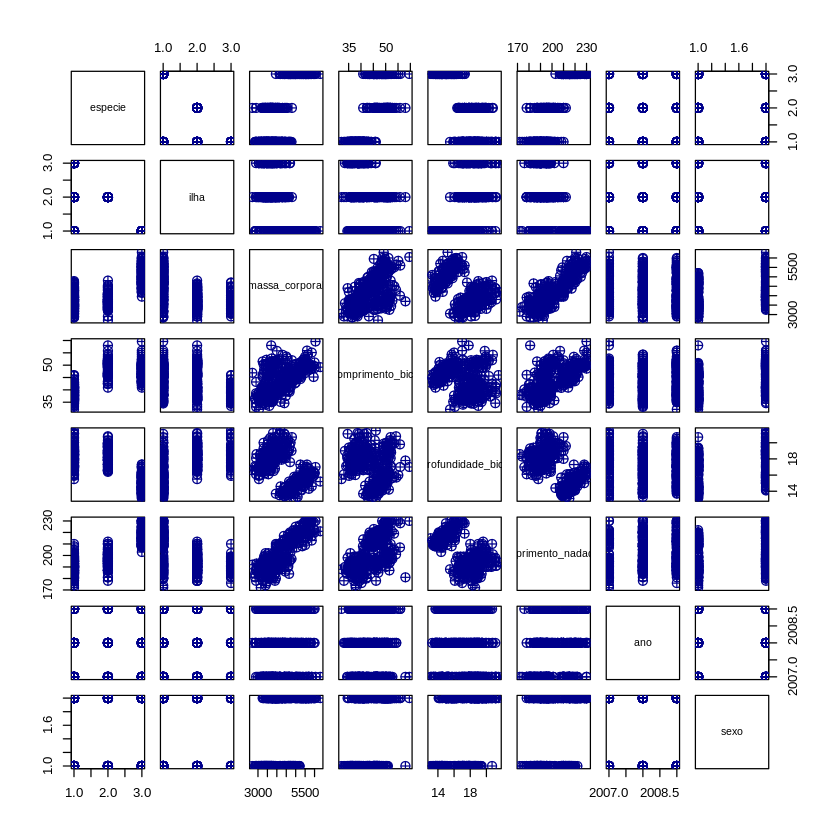

In [ ]:
#PLOT DA CORRELAÇÃO ENTRE TODAS AS VARIÁVEIS
plot(pinguins_limpo , pch=10 , cex=1.5 , col="darkblue")

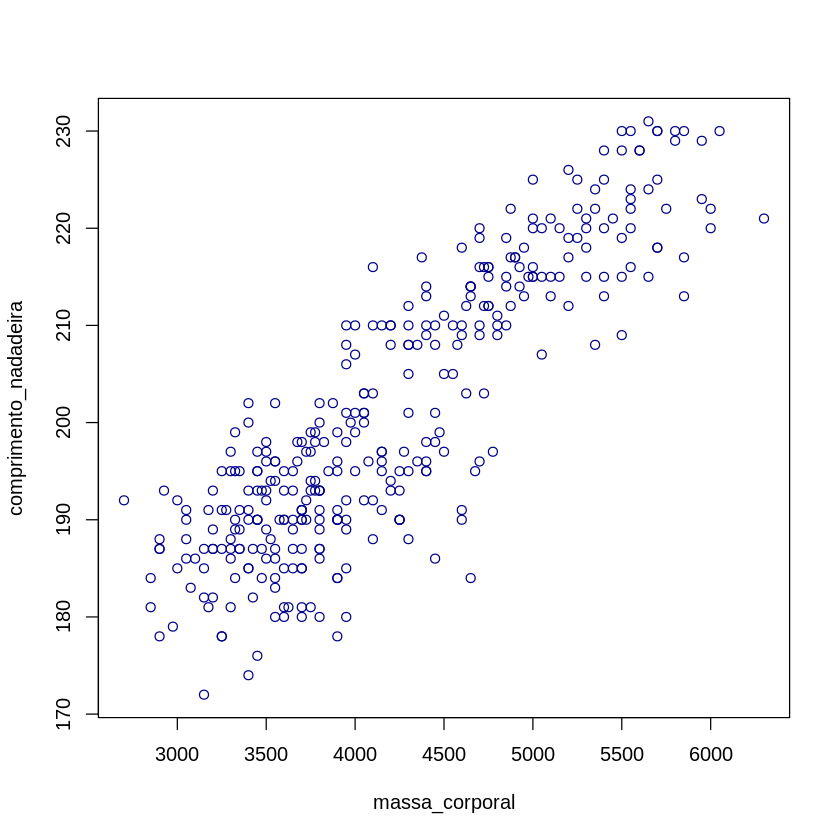

In [ ]:
# CORRELAÇÃO ENTRE MASSA CORPORAL E COMPRIMENTO DA NADADEIRA
plot(massa_corporal, comprimento_nadadeira, col="darkblue")

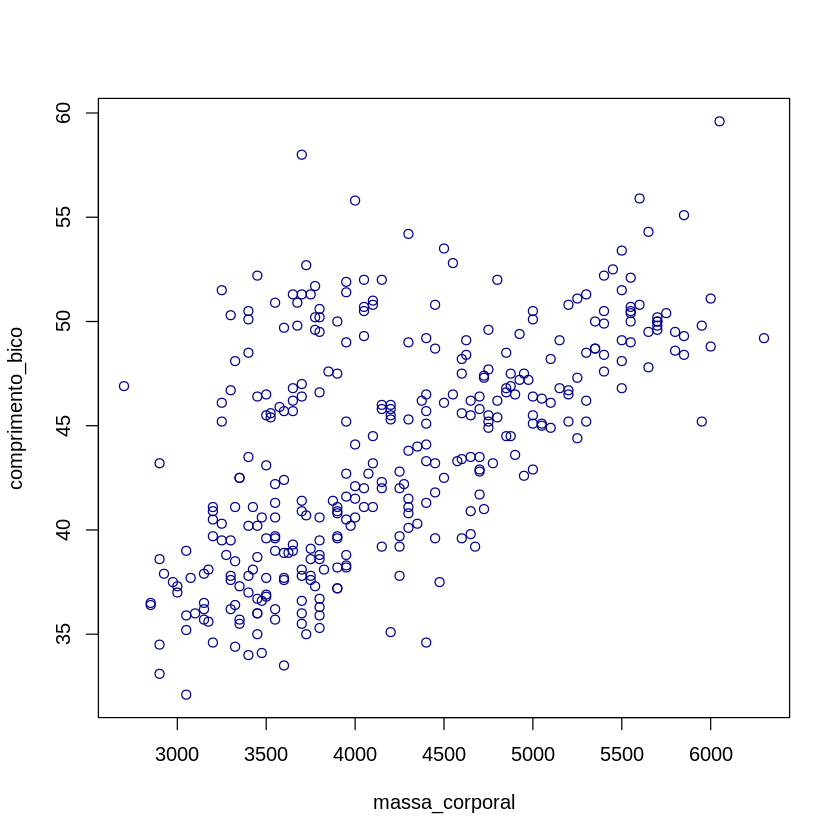

In [ ]:
# CORRELAÇÃO ENTRE MASSA CORPORAL E COMPRIMENTO DO BICO
plot(massa_corporal, comprimento_bico, col="darkblue")

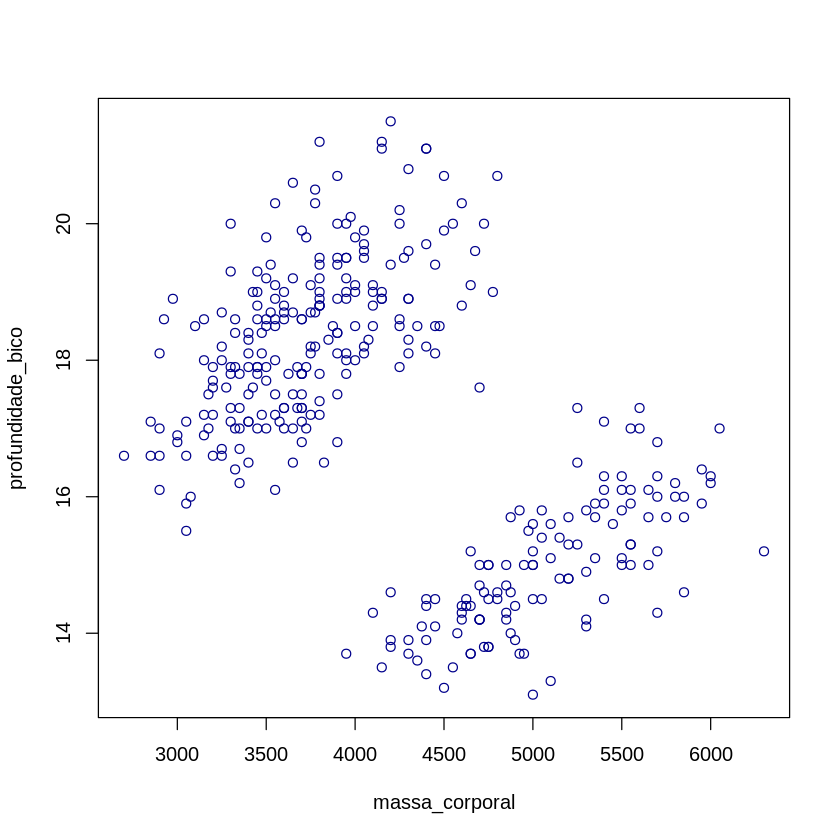

In [ ]:
# CORRELAÇÃO ENTRE MASSA CORPORAL E PROFUNDIDADE DO BICO
plot(massa_corporal, profundidade_bico, col="darkblue")

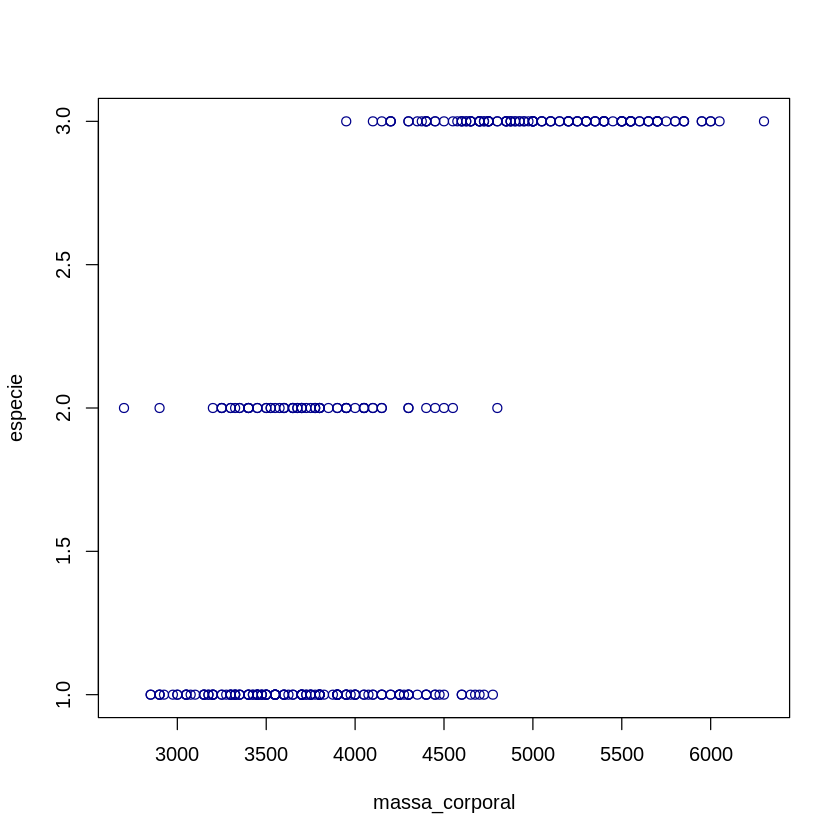

In [ ]:
# CORRELAÇÃO ENTRE MASSA CORPORAL E ESPECIE
plot(massa_corporal, especie, col="darkblue")

In [ ]:
#TABELA COM MATRIZ DE CORRELAÇÃO
correlacao = cor(pinguins_limpo[1:333,3:7])
correlacao

,massa_corporal,comprimento_bico,profundidade_bico,comprimento_nadadeira,ano
massa_corporal,1.00000000,0.5894511,-0.4720157,0.8729789,0.02186213
comprimento_bico,0.58945111,1.0000000,-0.2286256,0.6530956,0.03265690
profundidade_bico,-0.47201566,-0.2286256,1.0000000,-0.5777917,-0.04818160
comprimento_nadadeira,0.87297890,0.6530956,-0.5777917,1.0000000,0.15106792
ano,0.02186213,0.0326569,-0.0481816,0.1510679,1.00000000


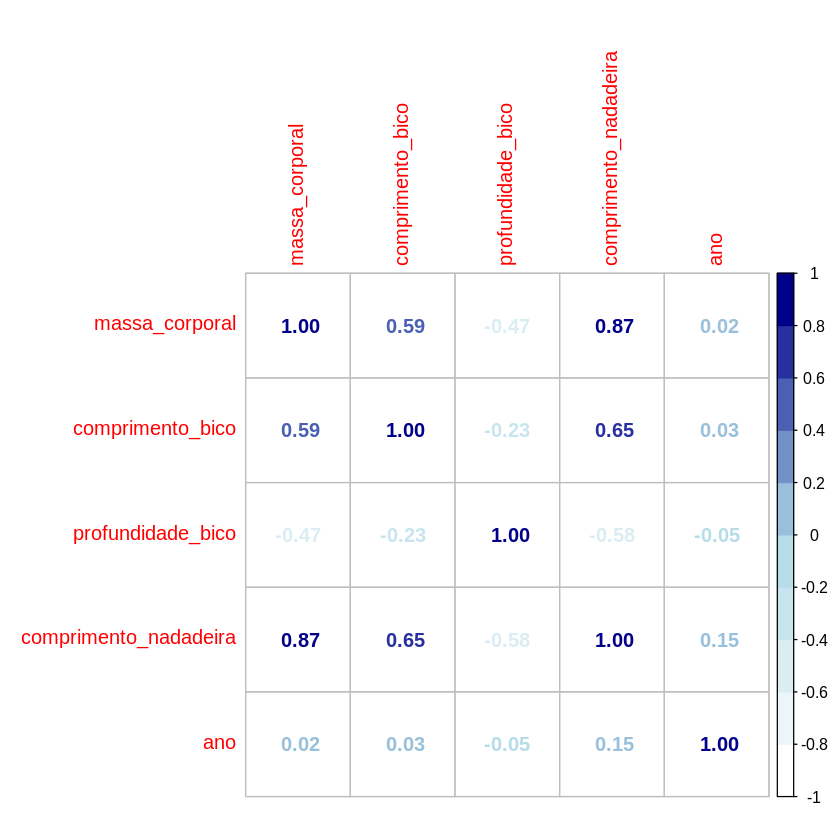

In [ ]:
#MATRIZ DE CORRELAÇÃO GRÁFICA
corrplot(correlacao,method = "number",col = cores_azuis)

## **Os modelos**

In [ ]:
#MODELO AJUSTADO E COM INTERCEPTO
regressao_com_interc = lm(massa_corporal~  comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano, data = pinguins_limpo)
summary(regressao_com_interc)
# CRITERIO DE INFORMACAO DE AKAIDE - AIC - DO MODELO AJUSTADO COM INTERCEPTO
paste("AIC do modelo com intercepto: ",AIC(regressao_com_interc))


Call:
lm(formula = massa_corporal ~ comprimento_bico + comprimento_nadadeira + 
    profundidade_bico + especie + ano, data = pinguins_limpo)

Residuals:
    Min      1Q  Median      3Q     Max 
-791.83 -195.71  -29.15  198.59  970.50 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                105356.726  45399.715   2.321   0.0209 *  
comprimento_bico               40.207      7.177   5.602 4.51e-08 ***
comprimento_nadadeira          22.928      3.307   6.933 2.22e-11 ***
profundidade_bico             131.193     19.521   6.721 8.09e-11 ***
especiePinguim-de-barbicha   -520.935     82.476  -6.316 8.78e-10 ***
especiePinguim-gentoo         852.874    148.220   5.754 2.01e-08 ***
ano                           -54.768     22.677  -2.415   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 312.5 on 326 degrees of freedom
Multiple R-squared:  0.8521,	Adjusted R-squared:  0.8494 
F-sta

[1] "AIC do modelo com intercepto:  4779.76412091895"

In [ ]:
#MODELO AJUSTADO E SEM INTERCEPTO
regressao_sem_interc = lm(massa_corporal~ comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano -1 , data = pinguins_limpo)
summary(regressao_sem_interc)
# CRITERIO DE INFORMACAO DE AKAIDE - AIC - DO MODELO AJUSTADO SEM INTERCEPTO
paste("AIC do modelo sem o intercepto: ",AIC(regressao_sem_interc))


Call:
lm(formula = massa_corporal ~ comprimento_bico + comprimento_nadadeira + 
    profundidade_bico + especie + ano - 1, data = pinguins_limpo)

Residuals:
    Min      1Q  Median      3Q     Max 
-791.83 -195.71  -29.15  198.59  970.50 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
comprimento_bico               40.207      7.177   5.602 4.51e-08 ***
comprimento_nadadeira          22.928      3.307   6.933 2.22e-11 ***
profundidade_bico             131.193     19.521   6.721 8.09e-11 ***
especiePinguim-de-adélia   105356.726  45399.715   2.321   0.0209 *  
especiePinguim-de-barbicha 104835.791  45389.863   2.310   0.0215 *  
especiePinguim-gentoo      106209.601  45354.020   2.342   0.0198 *  
ano                           -54.768     22.677  -2.415   0.0163 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 312.5 on 326 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9947 
F

[1] "AIC do modelo sem o intercepto:  4779.76412091893"

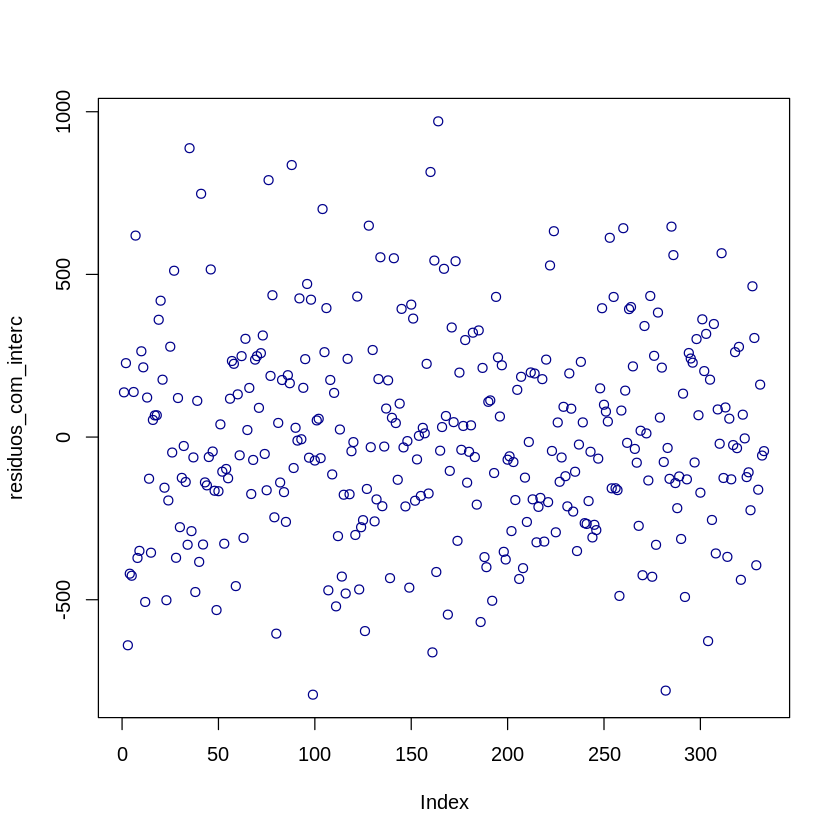

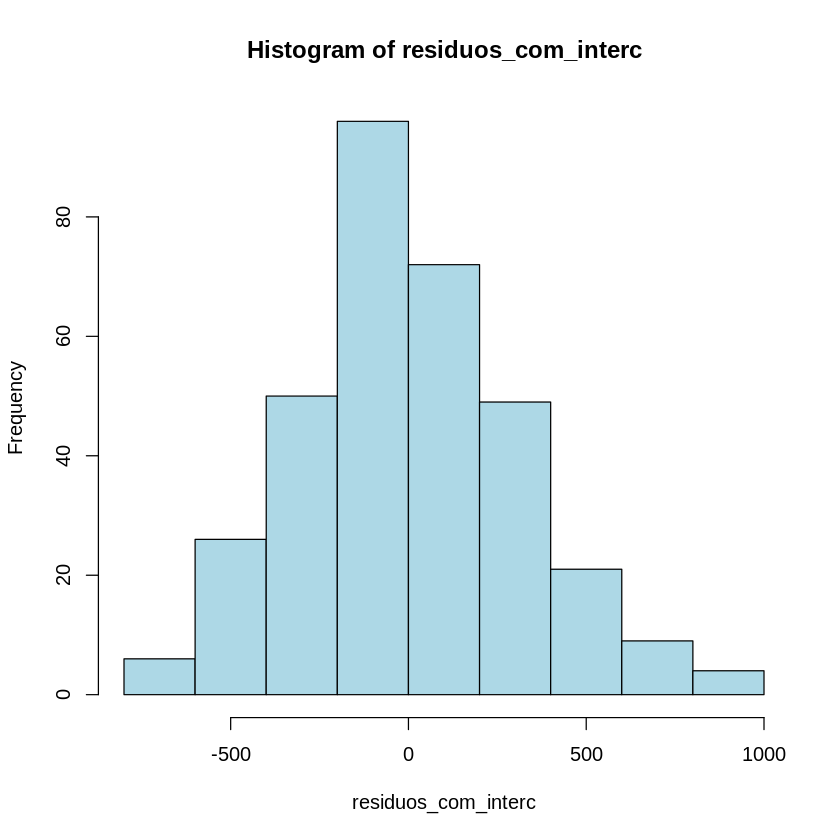

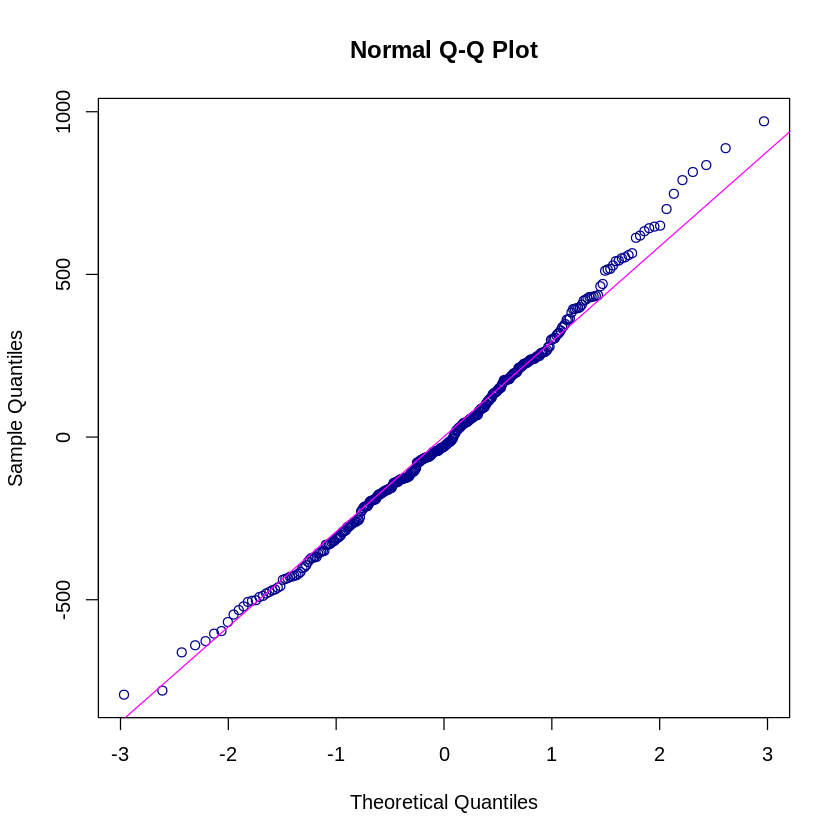

In [ ]:
#RESÍDUOS DO MODELO COM INTERCEPTO

yhat = fitted.values(regressao_com_interc)
residuos_com_interc = residuals(regressao_com_interc)

#DIAGRAMA DE DISPERSÃO
plot(residuos_com_interc,col="darkblue")
#HISTOGRAMA
hist(residuos_com_interc,col="lightblue")
#NORMAL Q-Q PLOT
qqnorm(residuos_com_interc,col="darkblue")
qqline(residuos_com_interc,col="magenta")

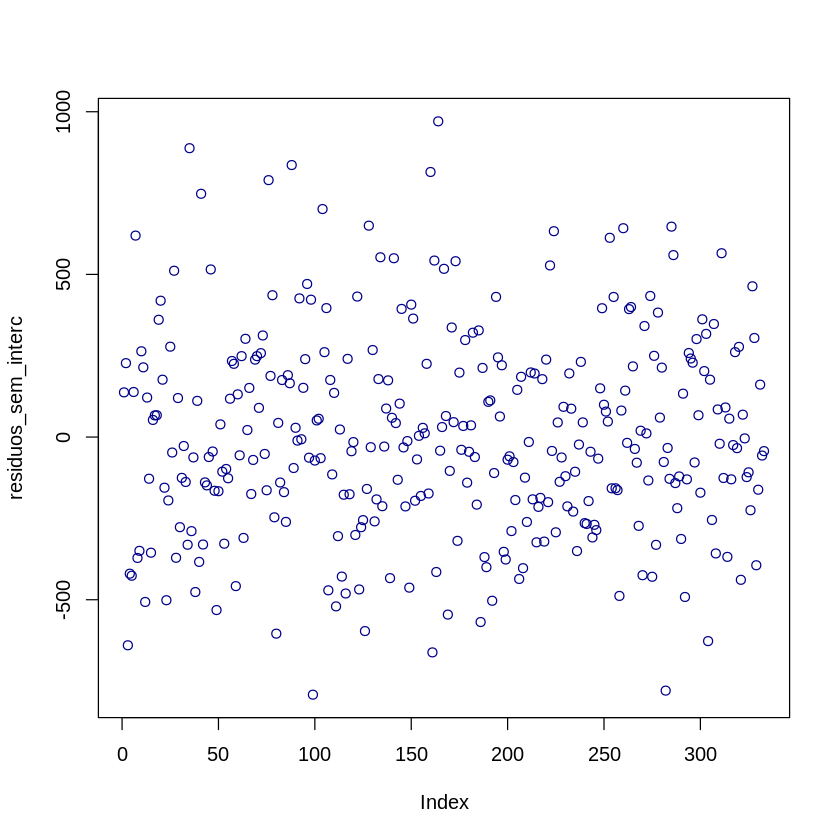

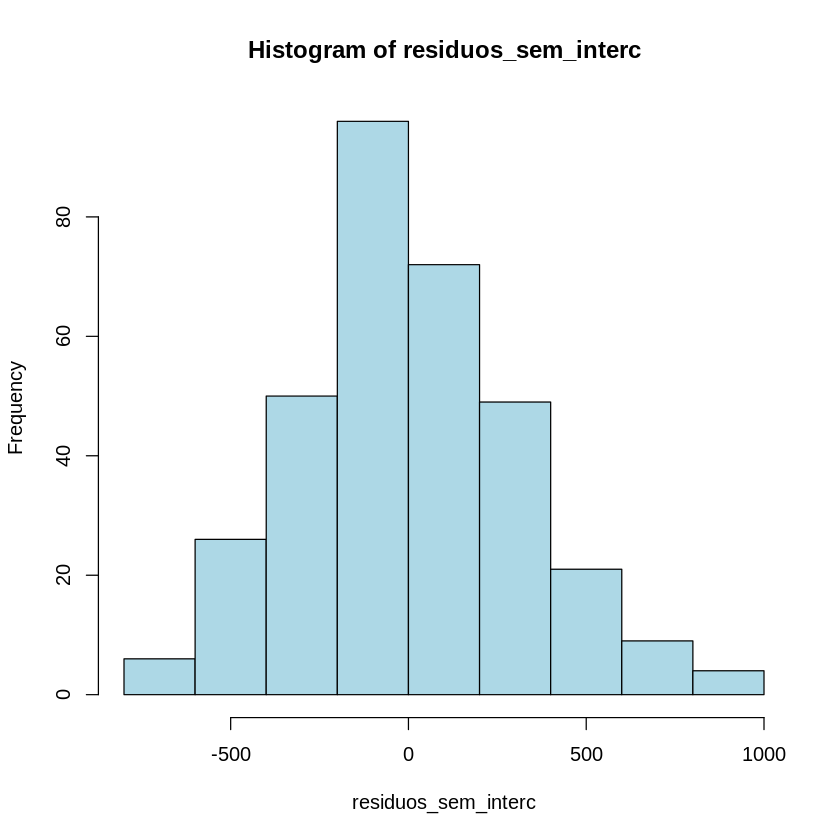

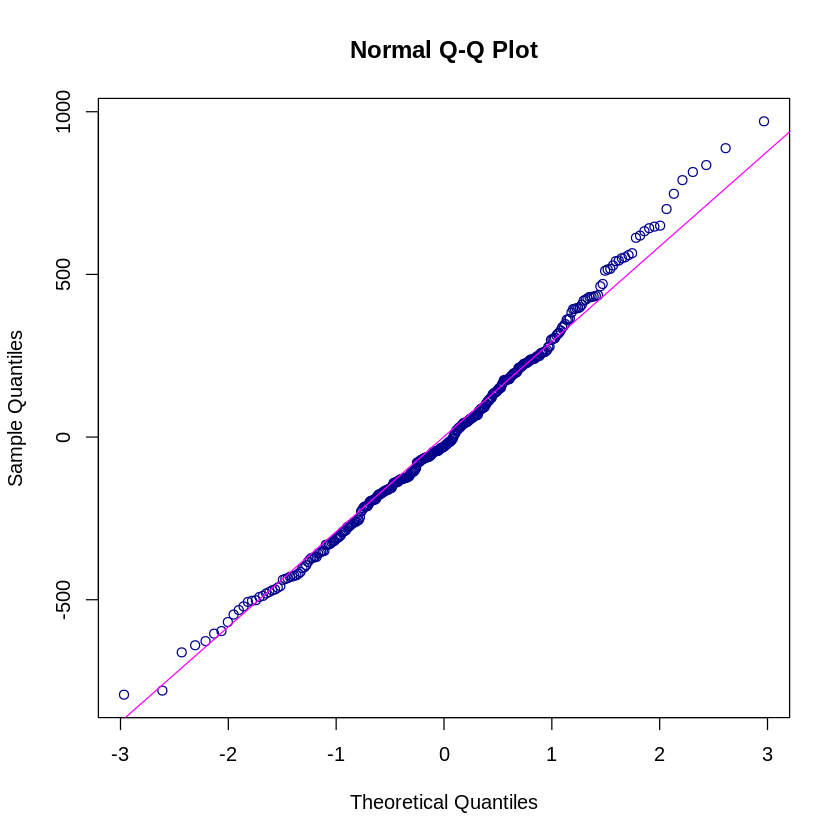

In [ ]:
#RESÍDUOS DO MODELO SEM INTERCEPTO

yhat = fitted.values(regressao_sem_interc)
residuos_sem_interc = residuals(regressao_sem_interc)

#DIAGRAMA DE DISPERSÃO
plot(residuos_sem_interc,col="darkblue")
#HISTOGRAMA
hist(residuos_sem_interc,col="lightblue")
#NORMAL Q-Q PLOT
qqnorm(residuos_sem_interc,col="darkblue")
qqline(residuos_sem_interc,col="magenta")

## **Treino dos modelos**

In [ ]:
# DIVISÃO DOS DADOS EM CONJUNTOS DE TREINO (75%) E TESTE (25%)
indice <- createDataPartition(pinguins_limpo$massa_corporal, p = 0.75, list = FALSE)
conjunto_treino <- pinguins_limpo[indice, ]
conjunto_teste <- pinguins_limpo[-indice, ]
paste("Tamanho do conjunto de treino: ", nrow(conjunto_treino))
paste("Tamanho do conjunto de teste: ", nrow(conjunto_teste))

[1] "Tamanho do conjunto de treino:  252"

[1] "Tamanho do conjunto de teste:  81"

In [ ]:
# APLICAÇÃO DO MODELO COM INTERCEPTO AO MODELO DE TREINO
modelo_treino_com_interc = lm(massa_corporal~  comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano, data = conjunto_treino)
summary(modelo_treino_com_interc)


Call:
lm(formula = massa_corporal ~ comprimento_bico + comprimento_nadadeira + 
    profundidade_bico + especie + ano, data = conjunto_treino)

Residuals:
   Min     1Q Median     3Q    Max 
-804.9 -188.7  -22.1  196.8  985.6 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                126683.228  52806.108   2.399   0.0172 *  
comprimento_bico               36.786      8.078   4.554 8.32e-06 ***
comprimento_nadadeira          24.078      3.910   6.158 3.00e-09 ***
profundidade_bico             125.445     22.360   5.610 5.45e-08 ***
especiePinguim-de-barbicha   -464.603     92.675  -5.013 1.03e-06 ***
especiePinguim-gentoo         809.649    171.216   4.729 3.81e-06 ***
ano                           -65.379     26.383  -2.478   0.0139 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 311.4 on 245 degrees of freedom
Multiple R-squared:  0.8484,	Adjusted R-squared:  0.8447 
F-statistic: 2

In [ ]:
mse_erros_intercep <- c()
mae_erros_intercep <- c()

conjunto_treino_intercep <- conjunto_treino
conjunto_teste_intercep <- conjunto_teste

for (i in 1:nrow(conjunto_teste_intercep)){

  # valor previsto pelo modelo para a observação i
  yHat <- predict(modelo_treino_com_interc, newdata = conjunto_teste_intercep[i, ])

  # erro do modelo para a observacao i
  erro <- yHat - as.numeric(conjunto_teste_intercep[i, "massa_corporal"])

  # salvar erros
  mse_erros_intercep <- c(mse_erros_intercep, erro^2)
  mae_erros_intercep <- c(mae_erros_intercep, abs(erro))

  # atualizando o conjunto de treino com a observacao testada
  conjunto_treino_intercep <- rbind(conjunto_treino_intercep, conjunto_teste_intercep[i, ])
  # ajustando o modelo agora que novas observações foram adicionadas ao conjunto
  modelo_treino_com_interc <- lm(massa_corporal ~ comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano, data = conjunto_treino)

}

final_mse <- mean(mse_erros_intercep, na.rm = TRUE)
final_mae <- mean(mae_erros_intercep, na.rm = TRUE)

print(paste("MSE Final:", final_mse))
print(paste("MAE Final:", final_mae))

[1] "MSE Final: 102026.805917758"
[1] "MAE Final: 256.786076813107"


In [ ]:
# APLICAÇÃO DO MODELO SEM INTERCEPTO AO MODELO DE TREINO

modelo_treino_sem_interc = lm(massa_corporal~ comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano -1 , data = conjunto_treino)
summary(modelo_treino_sem_interc)


Call:
lm(formula = massa_corporal ~ comprimento_bico + comprimento_nadadeira + 
    profundidade_bico + especie + ano - 1, data = conjunto_treino)

Residuals:
   Min     1Q Median     3Q    Max 
-804.9 -188.7  -22.1  196.8  985.6 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
comprimento_bico               36.786      8.078   4.554 8.32e-06 ***
comprimento_nadadeira          24.078      3.910   6.158 3.00e-09 ***
profundidade_bico             125.445     22.360   5.610 5.45e-08 ***
especiePinguim-de-adélia   126683.228  52806.108   2.399   0.0172 *  
especiePinguim-de-barbicha 126218.625  52790.662   2.391   0.0176 *  
especiePinguim-gentoo      127492.877  52740.883   2.417   0.0164 *  
ano                           -65.379     26.383  -2.478   0.0139 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 311.4 on 245 degrees of freedom
Multiple R-squared:  0.9948,	Adjusted R-squared:  0.9947 
F-statisti

In [ ]:
mse_erros <- c()
mae_erros <- c()

conjunto_treino_sem_intercep <- conjunto_treino
conjunto_teste_sem_intercep <- conjunto_teste

# Iteração sobre o conjunto de teste
for (i in 1:nrow(conjunto_teste)){

  # Faça previsões para o conjunto de teste atual
  yHat <- predict(modelo_treino_sem_interc, newdata = conjunto_teste_sem_intercep[i, ])

  # Calcule o erro de previsão
  mse_erro <- (yHat - as.numeric(conjunto_teste_sem_intercep[i, "massa_corporal"]))^2
  mae_erro <- abs(yHat - as.numeric(conjunto_teste_sem_intercep[i, "massa_corporal"]))

  # Salvar erros
  mse_erros <- c(mse_erros, mse_erro)
  mae_erros <- c(mae_erros, mae_erro)

  conjunto_treino_sem_intercep <- rbind(conjunto_treino_sem_intercep, conjunto_teste_sem_intercep[i, ])

  modelo_treino_sem_interc <- lm(massa_corporal~ comprimento_bico + comprimento_nadadeira + profundidade_bico + especie + ano -1 , data = conjunto_treino)

}

final_mse <- mean(mse_erros, na.rm = TRUE)
final_mae <- mean(mae_erros, na.rm = TRUE)

print(paste("MSE Final:", final_mse))
print(paste("MAE Final:", final_mae))

[1] "MSE Final: 102026.805917765"
[1] "MAE Final: 256.786076813109"
